## Weekly assignment 2

The first step is importing all necessary libraries and files.

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

#data set 1
df1 = pd.read_csv('steps.csv',sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#data set 2
df2 = pd.read_csv('survey.csv', sep=";")
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167,61.0


In [3]:
#data sets merged

df = pd.merge(df1, df2, on = 'id') 
df.head()

df = df.fillna(0)

Next I am creating the mean steps per participant. 

In [4]:
df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(numeric_only=True, axis=1)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167,61.0,874.557927


I want to see the mean steps per participant. 

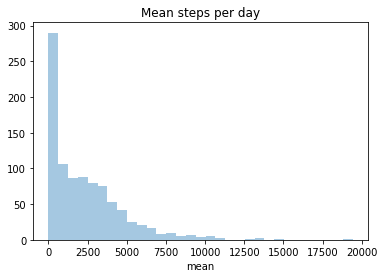

In [22]:
sns.distplot(df["mean"], kde=False) 
plt.title('Mean steps per day')
plt.show()

Now I am cleaning the dataset from unrealistic outliers.

In [5]:
#cleaning weight
#too high
def below_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_200)

#too low
def above_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_30)

In [6]:
#cleaning height
#too low
def below_100(x):
    if(x < 100): 
        return float('NaN')
    else: 
        return x
df['height'] = df['height'].apply(below_100)

I noted that there is a woman with a 20000 step average. I decided not to remove that value because she might just be a very active person, participating in e.g. marathon training while tracking or only tracked on fewer occasions with high activity, falsifying the average. One might chose to delete the outlier, however I decided to keep it in for now.

## The relation of meansteps per participant with 2 other quantitative variables 

Here I am creating a subset of variables I want to analyze: mean steps per participant, height and weight. 

In [7]:
df_sub = df[["mean", "height", "weight"]]
print(df_sub)

            mean  height  weight
0    5133.875000   178.0    98.0
1    2826.371951   180.0    77.0
2    3745.902439   180.0    83.0
3     221.536585   178.0    80.0
4     874.557927   167.0    61.0
..           ...     ...     ...
924  1742.908537   165.0    59.0
925   731.689024   192.0    90.0
926  6268.954268   181.0    71.0
927  3872.115854   172.0    65.0
928  3167.902439   180.0    76.0

[929 rows x 3 columns]


The pairplot gives a first visualization of the values of the new dataset. 

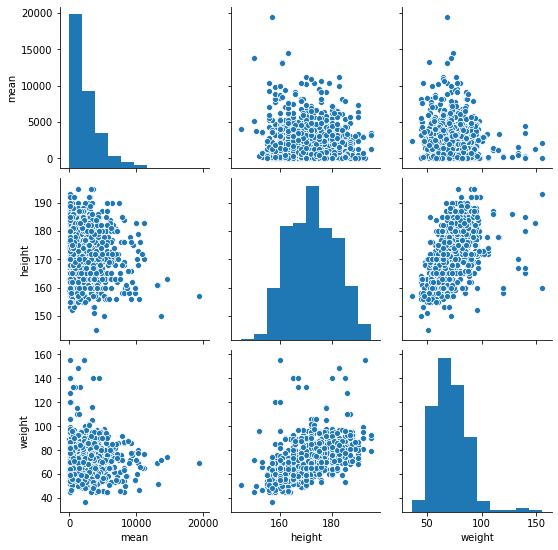

In [41]:
sns.pairplot(df_sub)
plt.show() #using Matplotlib to show the plot

## Scatterplots

Getting a closer look at the scatterplots between mean steps per participant and weight/height. 

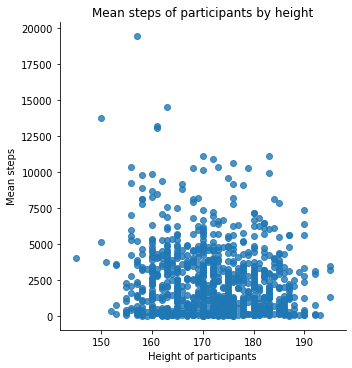

In [10]:
sns.lmplot(x='height', y="mean", fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Height of participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Mean steps of participants by height')
plt.show()

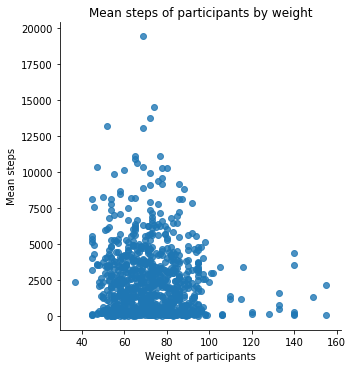

In [11]:
sns.lmplot(x='weight', y="mean", fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight of participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Mean steps of participants by weight')
plt.show()

## Correlation between variables


Next I want to find out the correlation between the variables. For that I first make a correlation matrix and visualize it in form of a heat map.

In [45]:
corr = df[['mean', 'height', 'weight']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,mean,height,weight
mean,1.000000,-0.063318,-0.105303
height,-0.063318,1.000000,0.502674
weight,-0.105303,0.502674,1.000000


As visually demonstrated in the heatmap there is a moderate correlation between height and weight. Furher the value 0,08 for height and weight is too small to indicate a relationship between mean and height as well as mean and weight. In short, there is no correlation with neither weight, nor height and mean steps per participant. 

## Relation?

In [46]:
from scipy.stats.stats import pearsonr 

df = df.fillna(0)

print(pearsonr(df['mean'],df['height']))
print(pearsonr(df['mean'],df['weight']))

(-0.06331764298206505, 0.053702574636946804)
(-0.10530260973591278, 0.0013081316685554034)


When analyzing mean and height, the output gives us two numbers: r which is -0.063, and p which is 0.053. The relation between mean and weight returns r= 0,105 and p= 0.001. We can thus conclude the following:

Mean and height

The mean and height are very weak to not correlated (r = -0.063)
With the p value (p = 0.053) the relation is significant. 

Mean and weight

For the mean steps and weight of participants there exists a weak negative linear correlation (r = -0.10). With the p value (p = 0.001) the relation is significant. 

I was also interested to plot the mean steps per participant in relation to age.

Text(0.5, 1.0, 'Comparing Age and Mean steps per participant in boxplot')

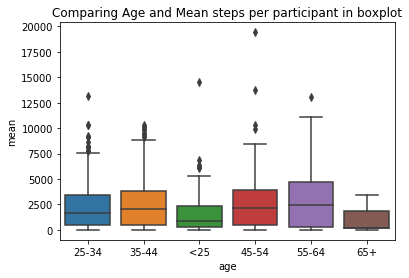

In [38]:
sns.boxplot(data = df, y="mean",x="age")
plt.title('Comparing Age and Mean steps per participant in boxplot')

## The relation of mean steps per participant with a qualitative (gender)

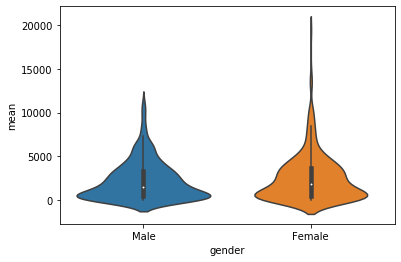

In [21]:
sns.violinplot(data=df, x="gender", y="mean")

## The relationship of 2 qualitative variables

When looking at the relationship between qualitative variables I was interested in plotting the count of female vs male participants per city. I used a countplot to visualize that below. We see that most respondents came from Lile and the ammount of female and male respondents from that region is about the same. In all other regions, there were more male respondents.

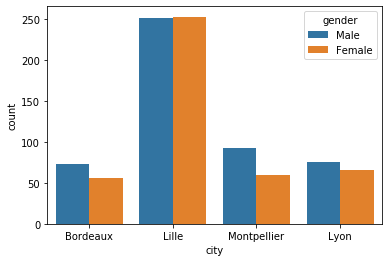

In [44]:
sns.countplot(x="city", hue="gender", data=df)
plt.show()

I was also intrested to compare the education between male and female respondents. In this barplot one can see that most male participants indicated to have a Master or doctorate. The majority of female respondents has a Bachelor degree followed by the Master/doctorate category. 

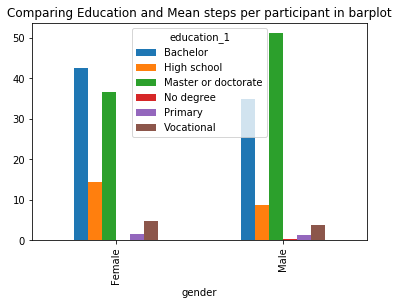

In [40]:
ct = pd.crosstab(df['gender'], df['education_1']).apply(lambda r: r/r.sum()*100, axis=1)
ct.plot.bar(stacked=False)
plt.title('Comparing Education and Mean steps per participant in barplot')
plt.show()